# Notch

Notch: Un algoritmo que permite la implementación de un filtro tipo notch. Creado *principalmente* para filtrar datos de EEG, de un arhivo .edf.

## Parámetros

__f0__ : float, opcional
    Frecuencia que se desea filtrar. Por defecto, f0=60 Hz.
    
__Q__ : int, opcional
    Factor de calidad del filtro. Por defecto, Q=50.
    
## Atributos

__f0__ : Frecuencia que elimina el filtro.

__Q__ : Factor de calidad del filtro.

## Métodos

1)  __read_edf__(*nameEdf*): Se encarga decargar un archivo .edf.

#### Parámetros
   __nameEdf__ : De tipo Str. Dirección (Opcional) y nombre del archivo .edf que se desea cargar. 
#### Salidas
   __in_signal__ : Definida como un numpy.array. Matriz de Canales X Tiempo extraida del archivo .edf. 
   
   __fs__ : De tipo float. Frecuencia de muestro de 'in_signal'.
   
   __headers__ : Un vector que contiene datos de tipo dict. Datos de la adqusición de *in_signal* (Frecuencia de muestreo, prefiltrado, transductor utilizado, etc...)
   
Un ejemplo de cómo utilizar este método es presentado a continuación.

In [ ]:
from notch import Notch

notch1 = Notch()
signal,fs,headers = notch1.read_edf('sujeto_base.edf')



2) __filt__(*in_signal,fs*): Se encarga de filtrar una señal.

#### Parámetros
   __in_signal__ : Definida como un numpy.array. Matriz de Canales X Tiempo.
   __fs__ : Frecuencia con la que 'in_signal' fue muestreada
#### Salidas
   __out_signal__ : Definida como un numpy.array. Matriz de Canales X Tiempo, que contiene los datos filtrados de *in_signal*
   
Un ejemplo de cómo utilizar este método es presentado a continuación.

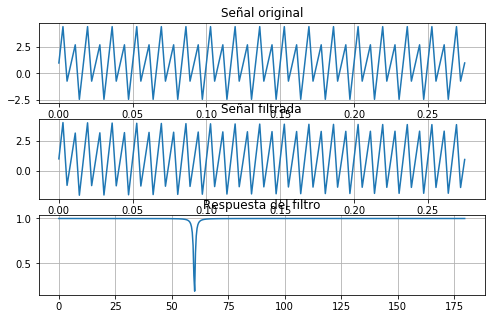

In [12]:
import matplotlib.pyplot as plt
from notch import Notch
import numpy as np
from numpy.fft import fft,fftfreq
from scipy import signal

fs = 360 # Frecuencia de muestreo.
ts = 1/fs # Periodo de muestreo.
n = 100 # Número de muestras.
t = np.linspace(0,(n-1)*ts,n) # Vector de tiempo
x= np.zeros((1,n)) # Matriz de 1 X n
x[0] = 1+np.sin(2*np.pi*60*t)+3*np.sin(2*np.pi*120*t) 
notch1 = Notch()
y,num,den = notch1.filt(x,fs)

# Generación de gráficas

fig,subplt=plt.subplots(3,1,figsize=(8,5))
subplt[0].plot(t,x[0])
subplt[0].title.set_text('Señal original')
subplt[0].grid()

subplt[1].plot(t,y[0])
subplt[1].title.set_text('Señal filtrada')
subplt[1].grid()

# Respuesta del filtro
w,h=signal.freqz(num,den)  
freq=w*fs/(2*np.pi)
subplt[2].plot(freq,abs(h))
subplt[2].title.set_text('Respuesta del filtro')
plt.grid()
plt.show()

3) __write_edf__(*in_signal,headers,nameEdf*): Se encarga de crear un nuevo archivo archivo .edf.

#### Parámetros
   __in_signal__ : Definida como numpy.array. Matriz de Canales X Tiempo que se desea guardar en el archivo .edf.
   __headers__ : Un vector que contiene datos de tipo dict. Datos de la adqusición de *in_signal* (Frecuencia de muestreo, prefiltrado, transductor utilizado, etc...).
   __nameEdf__ : De tipo str. Dirección (Opcional) y nombre del archivo .edf a generar.

Un ejemplo de cómo utilizar este método es presentado a continuación:

In [4]:
from notch import Notch

notch1 = Notch()
signal,fs,headers = notch1.read_edf('sujeto_base.edf')
notch1.write_edf(signal,headers,'prueba.edf') # Crea un archivo 'prueba.edf' igual a 'sujeto_base.edf' 


4) argparse() : Permite al usuario ingresar valores DESDE LA CONSOLA.

#### Parámetros
   __-i__ : De tipo str. Debe contener el nombre del archivo .edf que se desea cargar.
   __-fo__ : De tipo float, opcional. Debe contener la frecuencia que se desea eliminar de la señal. Por defecto es 60 Hz.
   __-Q__ : De tipo int, opcional. Debe contener el factor de calidad del filtro. Por defecto es de 50. 
   __-e__: De tipo str. Debe contener el nombre con el que se quiere guardar el nuevo archivo .edf.
#### Salidas
   __arc__ : De tipo str. Nombre del archivo .edf que se desea cargar
   __output__ : De tipo str. Nombre con que se desea guardar el nuevo archivo .edf.
   
Un ejemplo de como utilizar este método es presentado a continuación.

NOTA: Para ejecutar argparse, se necesita abrir la consola desde la dirección en donde está el código.

In [ ]:
from notch import Notch
notch1 = Notch()
arc,output = notch1.argparse()
signal , fs ,headers= notch1.read_edf(arc)
filtered_signal,num,den = notch1.filt(signal,fs)
notch1.write_edf(filtered_signal,headers,output)

**Desde la consola**

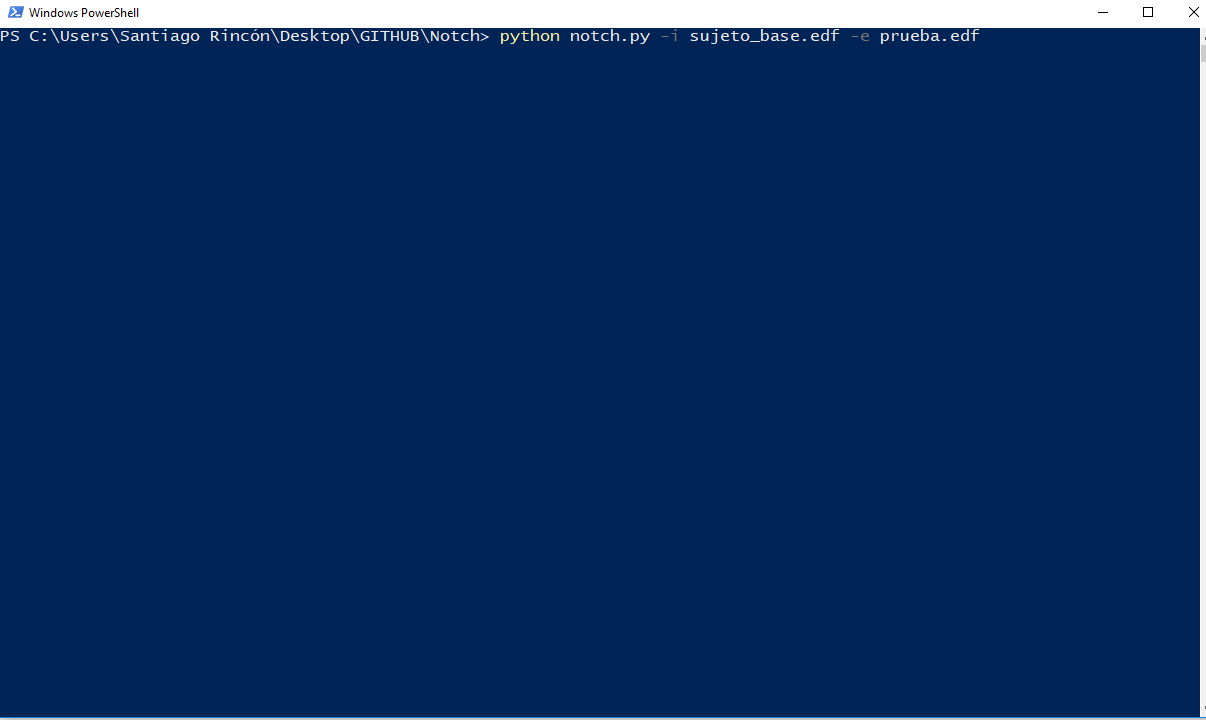

In [21]:
# Código para visualizar una imagen desde un URL.
from IPython.display import Image
i = Image(filename='Consola.PNG')
i